In [ ]:
!pip install tensorflow matplotlib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\aida-lab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(layer_input, num_filters, kernel_size=(3, 3), stride=1, conv_shortcut=False):
    """
    A basic residual block for ResNet.
    """
    shortcut = layer_input

    # First convolution
    features = Conv2D(num_filters, kernel_size, strides=stride, padding='same')(layer_input)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # Second convolution
    features = Conv2D(num_filters, kernel_size, padding='same')(features)
    features = BatchNormalization()(features)
    
    # Shortcut connection
    if conv_shortcut:
        shortcut = Conv2D(num_filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut and apply activation
    features = Add()([features, shortcut])
    output = Activation('relu')(features)
    return output

def build_resnet(input_shape, num_classes):
    """
    Builds a simple ResNet model.
    """
    input_layer = Input(shape=input_shape)

    # Initial convolution block
    features = Conv2D(64, (7, 7), strides=2, padding='same')(input_layer)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    features = tf.keras.layers.MaxPool2D((3, 3), strides=2, padding='same')(features)

    # Residual blocks
    features = residual_block(features, 64)
    features = residual_block(features, 64)
    features = residual_block(features, 128, stride=2, conv_shortcut=True)
    features = residual_block(features, 128)
    features = residual_block(features, 256, stride=2, conv_shortcut=True)
    features = residual_block(features, 256)
    
    # Final layers
    features = GlobalAveragePooling2D()(features)
    output_layer = Dense(num_classes, activation='softmax')(features)

    model = Model(input_layer, output_layer)
    return model

if __name__ == '__main__':
    input_shape = (32, 32, 3)  
    num_classes = 10          

    model = build_resnet(input_shape, num_classes)
    model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 64)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 64)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ activation_2[0][

 Total params: 2,792,074 (10.65 MB)

 Trainable params: 2,787,594 (10.63 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def residual_block(layer_input, num_filters, kernel_size=(3, 3), stride=1, conv_shortcut=False, dropout_rate=0.0):
    """
    A modified residual block for ResNet with optional dropout.
    """
    shortcut = layer_input

    # First convolution
    features = Conv2D(num_filters, kernel_size, strides=stride, padding='same')(layer_input)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # Add dropout for regularization
    if dropout_rate > 0:
        features = Dropout(dropout_rate)(features)
    
    # Second convolution
    features = Conv2D(num_filters, kernel_size, padding='same')(features)
    features = BatchNormalization()(features)
    
    # Shortcut connection
    if conv_shortcut:
        shortcut = Conv2D(num_filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut and apply activation
    features = Add()([features, shortcut])
    output = Activation('relu')(features)
    return output

def bottleneck_residual_block(layer_input, num_filters, stride=1, conv_shortcut=False):
    """
    A bottleneck residual block (1x1 -> 3x3 -> 1x1 convolutions).
    """
    shortcut = layer_input
    
    # First 1x1 convolution (reduce dimensions)
    features = Conv2D(num_filters // 4, (1, 1), strides=1, padding='same')(layer_input)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # 3x3 convolution
    features = Conv2D(num_filters // 4, (3, 3), strides=stride, padding='same')(features)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # Second 1x1 convolution (expand dimensions)
    features = Conv2D(num_filters, (1, 1), strides=1, padding='same')(features)
    features = BatchNormalization()(features)
    
    # Shortcut connection
    if conv_shortcut:
        shortcut = Conv2D(num_filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # Add shortcut and apply activation
    features = Add()([features, shortcut])
    output = Activation('relu')(features)
    return output

def build_resnet(input_shape, num_classes):
    """
    Builds a modified ResNet model with enhanced residual layers.
    """
    input_layer = Input(shape=input_shape)

    # Initial convolution block
    features = Conv2D(64, (7, 7), strides=2, padding='same')(input_layer)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    features = tf.keras.layers.MaxPool2D((3, 3), strides=2, padding='same')(features)

    # First residual block group (64 filters) - Added more blocks
    features = residual_block(features, 64)
    features = residual_block(features, 64)
    features = residual_block(features, 64)  # Additional block
    
    # Second residual block group (128 filters) - Added dropout
    features = residual_block(features, 128, stride=2, conv_shortcut=True, dropout_rate=0.1)
    features = residual_block(features, 128, dropout_rate=0.1)
    features = residual_block(features, 128, dropout_rate=0.1)  # Additional block
    
    # Third residual block group (256 filters) - Mixed regular and bottleneck
    features = residual_block(features, 256, stride=2, conv_shortcut=True, dropout_rate=0.2)
    features = bottleneck_residual_block(features, 256)  # Bottleneck block
    features = residual_block(features, 256, dropout_rate=0.2)
    
    # Fourth residual block group (512 filters) - New group
    features = residual_block(features, 512, stride=2, conv_shortcut=True, dropout_rate=0.3)
    features = bottleneck_residual_block(features, 512)  # Bottleneck block
    features = residual_block(features, 512, dropout_rate=0.3)
    
    # Final layers with dropout
    features = GlobalAveragePooling2D()(features)
    features = Dropout(0.5)(features)  # Final dropout layer
    output_layer = Dense(num_classes, activation='softmax')(features)

    model = Model(input_layer, output_layer)
    return model

if __name__ == '__main__':
    input_shape = (32, 32, 3)  
    num_classes = 10          

    model = build_resnet(input_shape, num_classes)
    model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 16, 16,    │      9,472 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_40       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ activation_40[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_61[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_41       │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_41[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_62[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_42       │ (None, 8, 8, 64)  │          0 │ add_24[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_42[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_63[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_43       │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_43[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_64[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ activation_42[0]

 Total params: 11,920,522 (45.47 MB)

 Trainable params: 11,907,850 (45.42 MB)

 Non-trainable params: 12,672 (49.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted (top 3): [('n02510455', 'giant_panda', np.float32(0.8309123)), ('n02056570', 'king_penguin', np.float32(0.007621698)), ('n02447366', 'badger', np.float32(0.005579212))]

Raw predictions array:
 [[5.95164129e-05 1.03727862e-05 2.99313160e-06 2.73272435e-05
  2.92194477e-06 1.40616430e-05 9.04985427e-07 7.63756470e-05
  1.47270010e-04 1.49369816e-05 6.59414900e-06 1.74110275e-04
  1.06256334e-06 1.44023886e-06 2.89966488e-06 7.21531080e-07
  4.48017590e-06 1.32155747e-05 2.10838552e-05 8.33165686e-05
  7.12638530e-06 1.25718105e-03 2.19362596e-06 4.25846301e-05
  4.13838370e-06 3.44072796e-05 1.56416772e-05 8.56429210e-07
  5.33674438e-06 6.52173112e-05 2.89846668e-07 1.59459996e-05
  7.77885180e-06 1.93959841e-05 4.18591371e-05 1.48861864e-05
  2.38764827e-04 4.60032197e-07 2.15263179e-04 7.26489634e-06
  3.85443354e-06 2.28032168e-05 8.52765515e-06 1.38368318e-06
  1.52800803e-05 1.69061732e-05 1.82935219e-06 2.82584620e-06
  4.47090133e-06

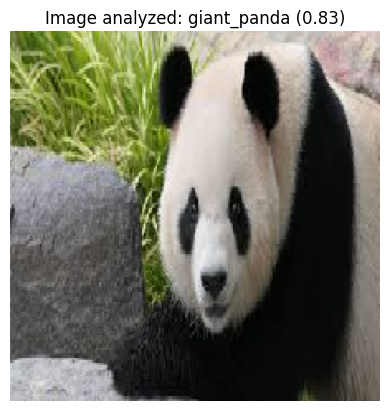

In [2]:
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
if not os.path.exists('cat.jpg'):
    print("Creating a dummy 'cat.jpg' for demonstration purposes.")
    
    dummy_image_data = np.zeros((224, 224, 3), dtype=np.uint8) + 150 
    plt.imsave('cat.jpg', dummy_image_data)
    print("Dummy 'cat.jpg' created. For better results, replace it with an actual cat image.")

pretrained_model = ResNet50(weights='imagenet', include_top=True)
image_path = 'panda.jpg' 
loaded_image = image.load_img(image_path, target_size=(224, 224)) 
image_array = image.img_to_array(loaded_image)
batch_image = np.expand_dims(image_array, axis=0) 
preprocessed_image = preprocess_input(batch_image) 

prediction_results = pretrained_model.predict(preprocessed_image)
print('Predicted (top 3):', decode_predictions(prediction_results, top=3)[0])
print('\nRaw predictions array:\n', prediction_results)
top_prediction = decode_predictions(prediction_results, top=1)[0]
print('\nPredicted (most confident):', top_prediction[0])
plt.imshow(loaded_image)
plt.title(f"Image analyzed: {top_prediction[0][1]} ({top_prediction[0][2]:.2f})")
plt.axis('off')
plt.show()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted (top 3): [('n02510455', 'giant_panda', np.float32(0.9998733)), ('n02447366', 'badger', np.float32(6.273274e-05)), ('n02412080', 'ram', np.float32(3.5517867e-05))]

Predicted (most confident): ('n02510455', 'giant_panda', np.float32(0.9998733))


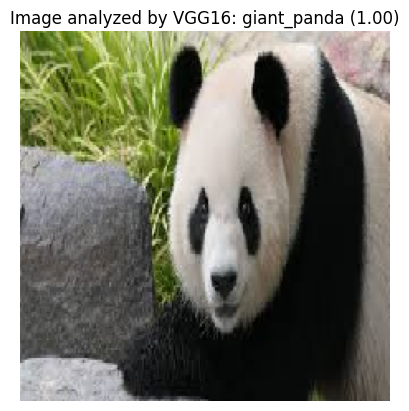

In [ ]:
import os
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions 
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists(img_filename):
    print(f"Creating a dummy '{img_filename}' for demonstration purposes.")

    dummy_image_data = np.zeros((224, 224, 3), dtype=np.uint8) + 180 
    plt.imsave(img_filename, dummy_image_data)
    print(f"Dummy '{img_filename}' created. For better results, replace it with an actual panda image.")
    print("Example panda image:")
model = VGG16(weights='imagenet', include_top=True) 
img_path = img_filename
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) 
predictions = model.predict(x)
print('Predicted (top 3):', decode_predictions(predictions, top=3)[0])
d = decode_predictions(predictions, top=1)[0]
print('\nPredicted (most confident):', d[0])
plt.imshow(img)
plt.title(f"Image analyzed by VGG16: {d[0][1]} ({d[0][2]:.2f})")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def residual_block(layer_input, num_filters, kernel_size=(3, 3), stride=1, conv_shortcut=False, dropout_rate=0.0):
    """
    A modified residual block for ResNet with optional dropout.
    """
    shortcut = layer_input

    # First convolution
    features = Conv2D(num_filters, kernel_size, strides=stride, padding='same')(layer_input)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # Add dropout for regularization
    if dropout_rate > 0:
        features = Dropout(dropout_rate)(features)
    
    # Second convolution
    features = Conv2D(num_filters, kernel_size, padding='same')(features)
    features = BatchNormalization()(features)
    
    # Shortcut connection
    if conv_shortcut:
        shortcut = Conv2D(num_filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut and apply activation
    features = Add()([features, shortcut])
    output = Activation('relu')(features)
    return output

def bottleneck_residual_block(layer_input, num_filters, stride=1, conv_shortcut=False):
    """
    A bottleneck residual block (1x1 -> 3x3 -> 1x1 convolutions).
    """
    shortcut = layer_input
    
    # First 1x1 convolution (reduce dimensions)
    features = Conv2D(num_filters // 4, (1, 1), strides=1, padding='same')(layer_input)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # 3x3 convolution
    features = Conv2D(num_filters // 4, (3, 3), strides=stride, padding='same')(features)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    
    # Second 1x1 convolution (expand dimensions)
    features = Conv2D(num_filters, (1, 1), strides=1, padding='same')(features)
    features = BatchNormalization()(features)
    
    # Shortcut connection
    if conv_shortcut:
        shortcut = Conv2D(num_filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # Add shortcut and apply activation
    features = Add()([features, shortcut])
    output = Activation('relu')(features)
    return output

def build_resnet(input_shape, num_classes):
    """
    Builds a modified ResNet model with enhanced residual layers.
    """
    input_layer = Input(shape=input_shape)

    # Initial convolution block
    features = Conv2D(64, (7, 7), strides=2, padding='same')(input_layer)
    features = BatchNormalization()(features)
    features = Activation('relu')(features)
    features = tf.keras.layers.MaxPool2D((3, 3), strides=2, padding='same')(features)

    features = residual_block(features, 64)
    features = residual_block(features, 64)
    features = residual_block(features, 64) 
    
    
    features = residual_block(features, 128, stride=2, conv_shortcut=True, dropout_rate=0.1)
    features = residual_block(features, 128, dropout_rate=0.1)
    features = residual_block(features, 128, dropout_rate=0.1)  
    
    features = residual_block(features, 256, stride=2, conv_shortcut=True, dropout_rate=0.2)
    features = bottleneck_residual_block(features, 256)  
    features = residual_block(features, 256, dropout_rate=0.2)
    
    features = residual_block(features, 512, stride=2, conv_shortcut=True, dropout_rate=0.3)
    features = bottleneck_residual_block(features, 512)  # Bottleneck block
    features = residual_block(features, 512, dropout_rate=0.3)
    
    features = GlobalAveragePooling2D()(features)
    features = Dropout(0.5)(features)  
    output_layer = Dense(num_classes, activation='softmax')(features)

    model = Model(input_layer, output_layer)
    return model

if __name__ == '__main__':
    input_shape = (32, 32, 3)  
    num_classes = 10          

    model = build_resnet(input_shape, num_classes)
    model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 16, 16,    │      9,472 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ activation_13[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_14[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 8, 8, 64)  │          0 │ add_12[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_15[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ activation_16[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ activation_15[0]

 Total params: 11,920,522 (45.47 MB)

 Trainable params: 11,907,850 (45.42 MB)

 Non-trainable params: 12,672 (49.50 KB)